In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_predict
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

C:\Users\Erin\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load the Data
train = pd.read_csv('input/train2.csv')
test = pd.read_csv('input/test2.csv')

# Feature engineering 
## (resulting from visualization and exploration below)

Feature engineering:

- female and class 1 or class 2 (96% survival)
- female and class 3 and under 24 years and fare less than 10 (67% survival)
- male and first class and under 40 years and fare between 25 and 40 (71% survival)
- male and under 18 and class 1 or class 2 (85% survival)

In [3]:
def createNewCol(boolx):
    featx = []
    for i in range(len(boolx)):
        if boolx[i]:
            featx.append(1) 
        else:
            featx.append(0) 

    return featx

In [4]:
# (1) females in first or second class predominantly survive
bool2 = (train['Pclass'] < 3) & (train['Gender'] == 0)
bool2t = (test['Pclass'] < 3) & (test['Gender'] == 0)
print(sum(bool2))

train["femalesHighClass"] = createNewCol(bool2)
test["femalesHighClass"] = createNewCol(bool2t)

168


In [5]:
# (2) females in 3rd class and under 24 years and fare less than 8 
bool3 = (train['Pclass'] == 3) & (train['Gender'] == 0) & (train['AgeFill'] < 24) & (train['FareFill'] < 8)
bool3t = (test['Pclass'] == 3) & (test['Gender'] == 0) & (test['AgeFill'] < 24) & (test['FareFill'] < 8)
print(sum(bool3))

train["thirdClassFSingle"] = createNewCol(bool3)
test["thirdClassFSingle"] = createNewCol(bool3t)

39


In [6]:
# (3) boys younger than 18 in the first or second class predominantly survive
bool1 = (train['AgeFill'] < 18) & (train['Pclass'] < 3) & (train['Gender'] == 1)
bool1t = (test['AgeFill'] < 18) & (test['Pclass'] < 3) & (test['Gender'] == 1)
print(sum(bool1))

train["boysHighClass"] = createNewCol(bool1)
test["boysHighClass"] = createNewCol(bool1t)

15


In [7]:
# (4) male and first class and under 40 years and fare between 25 and 50
bool1 = (train['FareFill'] > 25) & (train['FareFill'] < 50) & (train['AgeFill'] < 40) \
        & (train['Pclass'] == 1) & (train['Gender'] == 1)
bool1t = (test['FareFill'] > 25) & (test['FareFill'] < 50) & (test['AgeFill'] < 40) \
        & (test['Pclass'] == 1) & (test['Gender'] == 1)
print(sum(bool1))

train["singleMenFirstClass"] = createNewCol(bool1)
test["singleMenFirstClass"] = createNewCol(bool1t)

15


In [8]:
# save new training and test features data
train.to_csv('input/train3.csv', index=False)
test.to_csv('input/test3.csv', index=False)

# Data exploration

In [9]:
# create hold-out set

features = list(train.columns.values)[2::]
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Survived'])

In [10]:
X_train.groupby(y_train).mean()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
Survived,,,,,,,,,,,
0,2.512376,0.606436,0.329208,0.849010,0.299505,29.258663,21.762663,0.019802,0.024752,0.004950,0.004950
1,1.996183,0.473282,0.511450,0.312977,0.446565,27.311718,43.988184,0.458015,0.095420,0.034351,0.034351


In [11]:
X_train.groupby('Pclass').mean()

,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
Pclass,,,,,,,,,,
1,0.437908,0.411765,0.581699,0.372549,37.728235,78.742620,0.418301,0.000000,0.026144,0.071895
2,0.396104,0.383117,0.584416,0.129870,29.794351,20.251894,0.415584,0.000000,0.045455,0.000000
3,0.671309,0.403900,0.685237,0.448468,23.998384,14.347096,0.000000,0.097493,0.000000,0.000000


# Data visualization

Feature engineering:

- female and class 1 or class 2 (96% survival)
- female and class 3 and under 24 years and fare less than 10 (67% survival)
- male and first class and under 40 years and fare between 25 and 40 (71% survival)
- male and under 18 and class 1 or class 2 (85% survival)


Working summary:

- Male (17.9% survival)
    - under 18 (36.4% survival; 16% for over 18)
    - class 1 (36.5% survival; 13% for class 2 or 3)
   
- Female (74.3% survival)
    - over 18 (76.8% survival; 67% for under 18)
    - class 1 (96% survival; 92% for class 2, 51% for class 3)
    
- Males in 1st class (36.5% survival: who are the 31 out of 85 that survive(in this sample)?)
    - port information not helpful
    - fare information not helpful
    - under age 40 and paying between 25 and 50 dollars more likely to survive (71%; n = 10)
    - Number of boys in first class is small; despite all boys surviving
- Males under 18 (36.4% survival: who are the 16 out of 44 that survive(in this sample)?)
    - port information not helpful
    - boys in 1st and 2nd class predominantly survive (85%; n = 11)
    - boys in 3rd class with one sibling are more likely to survive (57%; n = 4)
- Females in 3rd class (51% survival: who are the 56 out of 110 that survive(in this sample)?
    - females under 24 yrs and by themselves pay a fare less than 8 dollars are more likely to survive (70%; n = 26) 

Male survival % 0.192941176471
Female survival % 0.746887966805


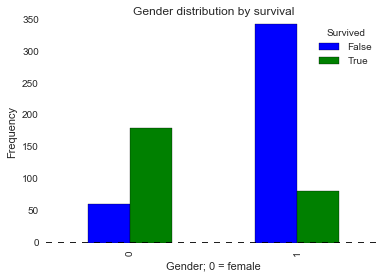

In [14]:
# gender and survival
pd.crosstab(X_train.Gender, y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

lst = y_train[(X_train['Gender'] == 1)] 
print("Male survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Gender'] == 0)] 
print("Female survival %", sum(lst2)/len(lst2))

Male under 18 survival % 0.382978723404
Male over 18 survival % 0.171195652174
Female under 18 survival % 0.704545454545
Female over 18 survival % 0.764705882353


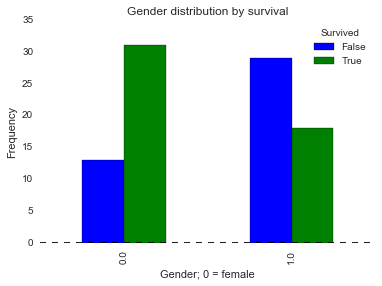

In [15]:
# gender and survival in those under 18 years of age
pd.crosstab(X_train.Gender[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

lst = y_train[(X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Male under 18 survival %", sum(lst)/len(lst))
lst4 = y_train[(X_train['Gender'] == 1) & (X_train['AgeFill'] > 18)] 
print("Male over 18 survival %", sum(lst4)/len(lst4))

lst2 = y_train[(X_train['Gender'] == 0) & (X_train['AgeFill'] < 18)] 
print("Female under 18 survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Gender'] == 0) & (X_train['AgeFill'] > 18)] 
print("Female over 18 survival %", sum(lst3)/len(lst3))

Class 1 survival % 0.633986928105
Class 2 survival % 0.448051948052
Class 3 survival % 0.267409470752


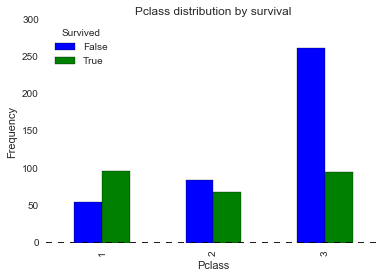

In [16]:
# passenger class and survival
pd.crosstab(X_train.Pclass, y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

lst = y_train[(X_train['Pclass'] == 1)] 
print("Class 1 survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Pclass'] == 2)] 
print("Class 2 survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Pclass'] == 3)] 
print("Class 3 survival %", sum(lst3)/len(lst3))

Class 1 male survival % 0.393258426966
Class 2 male survival % 0.122222222222
Class 3 male survival % 0.146341463415


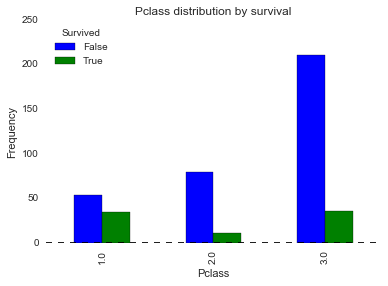

In [17]:
# survival frequency of men by class
pd.crosstab(X_train.Pclass[X_train.Gender == 1], y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

lst = y_train[(X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Class 1 male survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Pclass'] == 2) & (X_train['Gender'] == 1)] 
print("Class 2 male survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Pclass'] == 3) & (X_train['Gender'] == 1)] 
print("Class 3 male survival %", sum(lst3)/len(lst3))

In [18]:
lst = y_train[(X_train['Pclass'] == 1) & (X_train['Gender'] == 0)] 
print("Class 1 female survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Pclass'] == 2) & (X_train['Gender'] == 0)] 
print("Class 2 female survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Pclass'] == 3) & (X_train['Gender'] == 0)] 
print("Class 3 female survival %", sum(lst3)/len(lst3))

Class 1 female survival % 0.96875
Class 2 female survival % 0.90625
Class 3 female survival % 0.530973451327


# Men and 1st class (which men survive?)

In [19]:
lst = y_train[(X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Number of 1st class male passengers =", len(lst))
print("Number of 1st class male survivors =", sum(lst))

Number of 1st class male passengers = 89
Number of 1st class male survivors = 35


In [20]:
# number first class males under 18 and survival
lst = y_train[(X_train['AgeFill'] < 18) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Under 18 1st class male survival %", sum(lst)/len(lst))
print("But a small # with passengers = ", len(lst))

lst2 = y_train[(X_train['AgeFill'] > 18) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Over 18 1st class male survival %", sum(lst2)/len(lst2))


Under 18 1st class male survival % 1.0
But a small # with passengers =  4
Over 18 1st class male survival % 0.369047619048


Parch 0 survival % 0.383561643836
Parch 1 survival % 0.285714285714
Parch 2 survival % 0.625


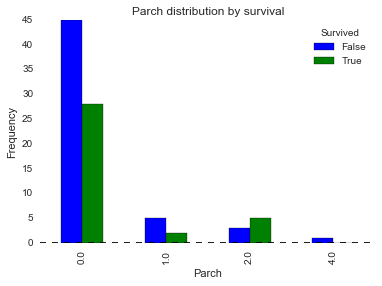

In [21]:
# number of children for first class males and survival
pd.crosstab(X_train.Parch[(X_train['Pclass'] == 1) & (X_train['Gender'] == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

lst = y_train[(X_train['Parch'] == 0) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Parch 0 survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Parch'] == 1) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Parch 1 survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Parch'] == 2) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("Parch 2 survival %", sum(lst3)/len(lst3))

SibSp 0 1st class male survival % 0.365079365079
SibSp 1 1st class male survival % 0.5
SibSp 2 1st class male survival % 0.0


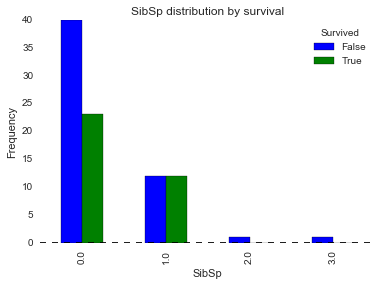

In [23]:
# number of siblings/spouses for first class males and survival
pd.crosstab(X_train.SibSp[(X_train.Pclass == 1) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

lst = y_train[(X_train['SibSp'] == 0) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("SibSp 0 1st class male survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['SibSp'] == 1) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("SibSp 1 1st class male survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['SibSp'] == 2) & (X_train['Pclass'] == 1) & (X_train['Gender'] == 1)] 
print("SibSp 2 1st class male survival %", sum(lst3)/len(lst3))

Port 0 survival % 0.360655737705
Port 1 survival % 0.481481481481
Port 2 survival % 0.0


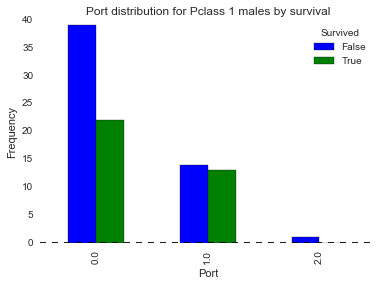

In [24]:
# port for 1st class males and survival
pd.crosstab(X_train.Port[(X_train['Pclass'] == 1) & (X_train['Gender'] == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution for Pclass 1 males by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

lst = y_train[(X_train['Port'] == 0) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)] 
print("Port 0 survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Port'] == 1) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)] 
print("Port 1 survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Port'] == 2) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)] 
print("Port 2 survival %", sum(lst3)/len(lst3))

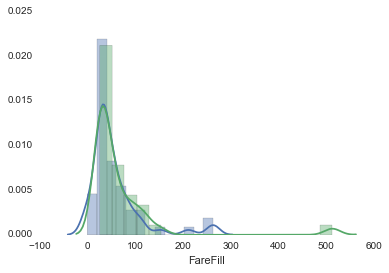

In [25]:
# fare distributions for 1st class men who survived and those who did not
sns.distplot(X_train['FareFill'][(y_train == 0) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)]) # blue
sns.distplot(X_train['FareFill'][(y_train == 1) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)]) # green

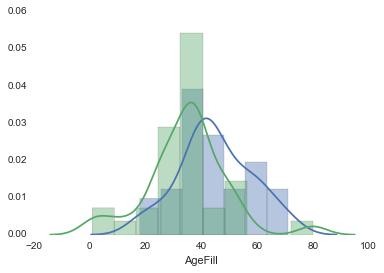

In [26]:
# age distributions for 1st class men who survived and those who did not
sns.distplot(X_train['AgeFill'][(y_train == 0) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)]) # blue
sns.distplot(X_train['AgeFill'][(y_train == 1) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)]) # green

In [28]:
# 1st class males paying between 25 and 50 dollars (who are likely alone) under 40 yrs...
lst3 = y_train[(X_train['Gender'] == 1) & (X_train['Pclass'] == 1) \
              & (X_train['FareFill'] < 50) & (X_train['FareFill'] > 25) \
              & (X_train['AgeFill'] < 40)]
 
print("1st class men alone younger than 40 yrs survival %", sum(lst3)/len(lst3), sum(lst3))

1st class men alone younger than 40 yrs survival % 0.818181818182 9


In [29]:
X_train[(y_train == 1) & (X_train['Gender'] == 1) & (X_train['Pclass'] == 1)]

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
646,1,0,0,1,1,56.00,35.5000,0,0,0,0
736,1,0,0,1,1,35.00,512.3292,0,0,0,0
603,1,0,0,1,1,35.00,26.5500,0,0,0,1
598,1,1,0,1,1,49.00,56.9292,0,0,0,0
739,1,0,0,1,0,40.00,30.0000,0,0,0,0
23,1,0,0,1,0,28.00,35.5000,0,0,0,1
629,1,0,0,1,0,80.00,30.0000,0,0,0,0
96,1,0,1,1,1,23.00,63.3583,0,0,0,0
483,1,1,0,1,1,25.00,91.0792,0,0,0,0
511,1,0,0,1,0,36.00,26.2875,0,0,0,1


# Boys under 18 (which boys survived?)

In [30]:
lst = y_train[(X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Number of boys under 18 =", len(lst))
print("Number of boys under 18 survived = ", sum(lst))

Number of boys under 18 = 47
Number of boys under 18 survived =  18


Class 1 boys survival % 1.0
Class 2 boys survival % 0.714285714286
Class 3 boys survival % 0.25
Boys' survival for classes 1 and 2 0.818181818182
Number of boys who survived from classes 1 and 2 =  9


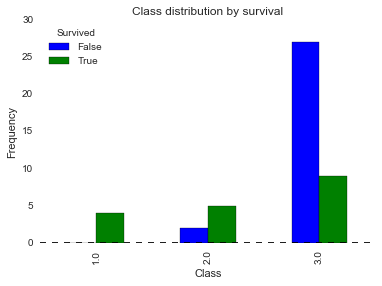

In [31]:
# survival of boys by class
pd.crosstab(X_train.Pclass[(X_train.AgeFill < 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Class distribution by survival')
plt.xlabel('Class')
plt.ylabel('Frequency')

lst = y_train[(X_train['Pclass'] == 1) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Class 1 boys survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Pclass'] == 2) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Class 2 boys survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Pclass'] == 3) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Class 3 boys survival %", sum(lst3)/len(lst3))

lst4 = y_train[(X_train['Pclass'] < 3) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Boys' survival for classes 1 and 2", sum(lst4)/len(lst4))
print("Number of boys who survived from classes 1 and 2 = ", sum(lst4))

Port 0 boys survival % 0.405405405405
Port 1 boys survival % 0.5
Port 2 boys survival % 0.0


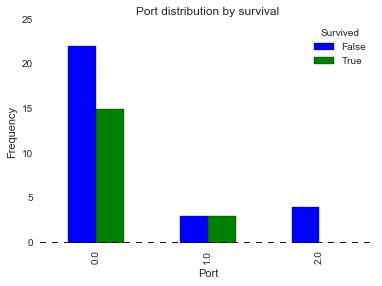

In [32]:
# survival of boys (< 18) by port
pd.crosstab(X_train.Port[(X_train.AgeFill < 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

lst = y_train[(X_train['Port'] == 0) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Port 0 boys survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Port'] == 1) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Port 1 boys survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Port'] == 2) & (X_train['Gender'] == 1) & (X_train['AgeFill'] < 18)] 
print("Port 2 boys survival %", sum(lst3)/len(lst3))

Parch 0 under 18 survival % 0.153846153846
Parch 1 under 18 survival % 0.454545454545
Parch 2 under 18 survival % 0.5


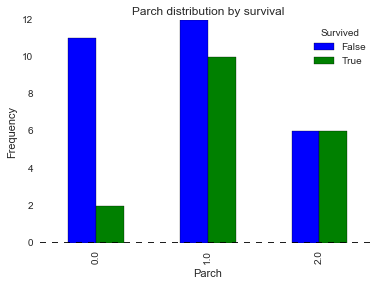

In [33]:
# survival of boys by number of parents (because unlikely they have children)
pd.crosstab(X_train.Parch[(X_train.AgeFill < 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

lst = y_train[(X_train['Parch'] == 0) & (X_train['AgeFill'] < 18) & (X_train.Gender == 1)] 
print("Parch 0 under 18 survival %", sum(lst)/len(lst))

lst2 = y_train[(X_train['Parch'] == 1) & (X_train['AgeFill'] < 18) & (X_train.Gender == 1)] 
print("Parch 1 under 18 survival %", sum(lst2)/len(lst2))

lst3 = y_train[(X_train['Parch'] == 2) & (X_train['AgeFill'] < 18) & (X_train.Gender == 1)] 
print("Parch 2 under 18 survival %", sum(lst3)/len(lst3))

Survival of boys under 18 in 3rd class with one sibling 0.5 4


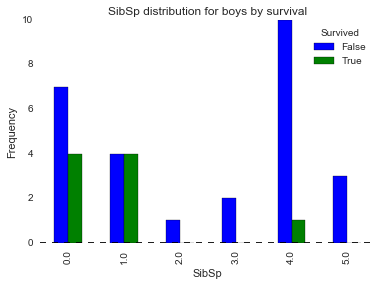

In [34]:
# survival of boys by # of siblings (because unlikely they have spouses)
pd.crosstab(X_train.SibSp[(X_train.AgeFill < 18) & (X_train.Gender == 1) & (X_train.Pclass == 3)], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution for boys by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

lst3 = y_train[(X_train['SibSp'] == 1) & (X_train['AgeFill'] < 18) & (X_train.Gender == 1) & (X_train.Pclass == 3)] 
print("Survival of boys under 18 in 3rd class with one sibling", sum(lst3)/len(lst3), sum(lst3))

# 3rd class female visualizations (which women survive?)

In [35]:
thirdClassData = X_train[X_train['Pclass'] == 3]
thirdClassY = y_train[X_train['Pclass'] == 3]

In [36]:
print("Number of third class female passengers = ",  len(thirdClassY[thirdClassData['Gender'] == 0]))
print("Number of third class female survivors = ",  sum(thirdClassY[thirdClassData['Gender'] == 0]))

Number of third class female passengers =  113
Number of third class female survivors =  60


In [37]:
# female survival predicted if in 3rd class
sum(thirdClassY[thirdClassData['Gender'] == 0])/len(thirdClassY[thirdClassData['Gender'] == 0])

0.53097345132743368

In [38]:
thirdClassData.groupby(thirdClassY).mean()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
Survived,,,,,,,,,,,
0,3,0.752852,0.387833,0.798479,0.365019,25.133080,14.434947,0,0.038023,0,0
1,3,0.447917,0.447917,0.375000,0.677083,20.889792,14.106422,0,0.260417,0,0


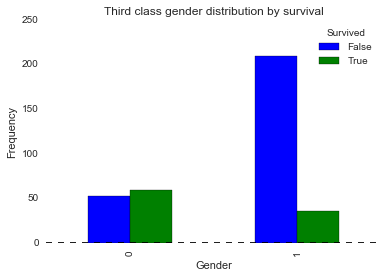

In [39]:
# gender and survival in the third class
pd.crosstab(thirdClassData.Gender, thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class gender distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

3rd class female and under 18 0.555555555556 27
3rd class female and over 18 0.5375 80


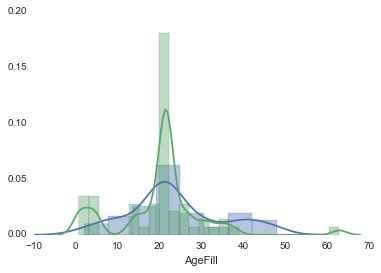

In [40]:
# survival predicted if in 3rd class, female, and under 18
lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.AgeFill < 18)] 
print("3rd class female and under 18", sum(lst)/len(lst), len(lst))

lst2 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.AgeFill > 18)] 
print("3rd class female and over 18", sum(lst2)/len(lst2), len(lst2))

# age distributions for 1st class females who survived and those who did not
sns.distplot(X_train['AgeFill'][(y_train == 0) & (X_train['Gender'] == 0) & (X_train['Pclass'] == 3)]) # blue
sns.distplot(X_train['AgeFill'][(y_train == 1) & (X_train['Gender'] == 0) & (X_train['Pclass'] == 3)]) # green

3rd class female and fare less than $20 0.614457831325 51
3rd class female and fare less than $8 0.702702702703 26


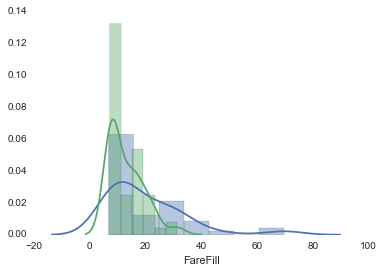

In [54]:
# fare distributions for 3rd class females who survived and those who did not
sns.distplot(X_train['FareFill'][(y_train == 0) & (X_train['Gender'] == 0) & (X_train['Pclass'] == 3)]) # blue
sns.distplot(X_train['FareFill'][(y_train == 1) & (X_train['Gender'] == 0) & (X_train['Pclass'] == 3)]) # green

lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.FareFill < 20)] 
print("3rd class female and fare less than $20", sum(lst)/len(lst), sum(lst))

lst2 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.FareFill < 8)] 
print("3rd class female and fare less than $8", sum(lst2)/len(lst2), sum(lst2))


In [48]:
thirdClassData[(thirdClassData['Gender'] == 0) & (thirdClassData.AgeFill < 24) & (y_train == 1) & (thirdClassData.FareFill < 10)]

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
47,3,0,0,0,2,21.5,7.7500,0,1,0,0
726,3,0,0,0,2,21.5,7.7375,0,1,0,0
105,3,0,0,0,0,21.0,7.6500,0,1,0,0
191,3,1,0,0,0,19.0,7.8542,0,1,0,0
299,3,0,0,0,2,21.5,7.7500,0,1,0,0
648,3,0,0,0,0,23.0,7.5500,0,1,0,0
367,3,0,0,0,2,21.5,7.7500,0,1,0,0
140,3,0,0,0,0,22.0,7.7500,0,1,0,0
779,3,0,0,0,1,13.0,7.2292,0,1,0,0
32,3,0,0,0,2,21.5,7.7500,0,1,0,0


In [50]:
# Females in 3rd class with fare less than 10 (because alone) and less than 24 years of age
lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.SibSp == 0)  & \
                  (thirdClassData.Parch == 0) & (thirdClassData.AgeFill < 24)] 
print("3rd class female survival with no parents/children/spouse = ", sum(lst)/len(lst), sum(lst))

lst2 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.FareFill < 10)] 
print("3rd class female survival with fare less than 10$ = ", sum(lst2)/len(lst2), sum(lst2))

lst3 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.AgeFill < 24) & (thirdClassData.FareFill < 10)] 
print("3rd class female survival with fare less than 10$ and under 24 yrs = ", sum(lst3)/len(lst3), sum(lst3))

3rd class female survival with no parents/children/spouse =  0.694444444444 25
3rd class female survival with fare less than 10$ =  0.617021276596 29
3rd class female survival with fare less than 10$ and under 24 yrs =  0.714285714286 25


In [56]:
# survival predicted if in 3rd class, female, and port is # 1 or #2
lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.Port >= 1)] 
print(sum(lst)/len(lst), sum(lst))

0.733333333333 33


3rd class female survival from port 0 =  0.397058823529 27
3rd class female survival from port 1 =  0.65 13
3rd class female survival from port 2 =  0.8 20


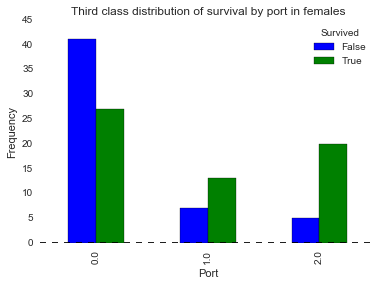

In [57]:
# Distribution of survival by port in females (most of these survivors are better captured by young single female feature)
pd.crosstab(thirdClassData.Port[thirdClassData.Gender == 0], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class distribution of survival by port in females')
plt.xlabel('Port')
plt.ylabel('Frequency')

lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.Port == 0)] 
print("3rd class female survival from port 0 = ", sum(lst)/len(lst), sum(lst))

lst2 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.Port == 1)] 
print("3rd class female survival from port 1 = ", sum(lst2)/len(lst2), sum(lst2))

lst3 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.Port == 2)] 
print("3rd class female survival from port 2 = ", sum(lst3)/len(lst3), sum(lst3))

3rd class female survival with SibSp 0 =  0.629032258065 62
3rd class female survival from SibSp 1 =  0.484848484848 33
3rd class female survival from SibSp 2 =  0.6 5


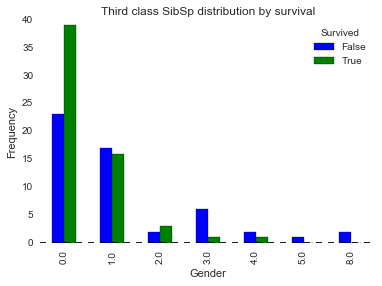

In [58]:
# 3rd class females and siblings/spouses
pd.crosstab(thirdClassData.SibSp[thirdClassData.Gender == 0], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class SibSp distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.SibSp == 0)] 
print("3rd class female survival with SibSp 0 = ", sum(lst)/len(lst), len(lst))

lst2 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.SibSp == 1)] 
print("3rd class female survival from SibSp 1 = ", sum(lst2)/len(lst2), len(lst2))

lst3 = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.SibSp == 2)] 
print("3rd class female survival from SibSp 2 = ", sum(lst3)/len(lst3), len(lst3))